# Inputing packges

In [1]:
import numpy as np

# Defining the class

In [15]:
class Perceptron:
    def __init__(self, list_layers:list[int]):
        self.weights = []
        self.bias = []

        for i in range(len(list_layers)-1):
            # use small random init to break symmetry
            fan_in, fan_out = list_layers[i], list_layers[i+1]
            self.weights.append(np.random.randn(fan_in, fan_out) * np.sqrt(2.0/fan_in))
            self.bias.append(np.zeros(fan_out))

        self.z_cache = []
        self.training = True
    
    def inference_mode(self):
        self.training = False

    def ReLU(self, X):
        return np.maximum(X, 0)
    
    def mse_loss(self, y_true, y_est):
        return np.mean((y_true - y_est) ** 2)
    
    def forward(self, X):
        output_X = X.copy()
        self.z_cache = [X]
        for layer_i in range(len(self.weights)):
            z_i = output_X @ self.weights[layer_i] + self.bias[layer_i]
            self.z_cache.append(z_i)
            output_X = self.ReLU(z_i)
        return output_X

    def backward(self, y_true, y_est, lr=0.1):
        N = y_true.shape[0]
        grad = 2 * (y_est - y_true) / N 
        for layer_i in range(len(self.weights) - 1, -1, -1):
            z_i = self.z_cache[layer_i + 1]
            X_i = self.ReLU(self.z_cache[layer_i]) if layer_i !=0 else self.z_cache[layer_i]
            #print(layer_i, grad.shape, self.weights[layer_i].shape, z_i.shape, X_i.shape)

            grad[ z_i < 0] = 0
            delta_weights = X_i.T @ grad
            delta_b = grad.sum(axis=0)
            grad =  grad @ self.weights[layer_i].T

            #upgrade the weights:
            self.weights[layer_i] -= lr * delta_weights
            self.bias[layer_i] -= lr * delta_b
        

    
layers = [2, 10, 2]
model = Perceptron(layers)

n_datapoints = 5
X = np.random.randn(n_datapoints,2)
y_true = np.abs(X)

y_pred = model.forward(X)
y_pred

model.backward(y_true, y_pred)

In [52]:
model.weights

[array([[1183.19440505, 1183.19440505, 1183.19440505, 1183.19440505,
         1183.19440505, 1183.19440505, 1183.19440505, 1183.19440505,
         1183.19440505, 1183.19440505],
        [ -97.6844364 ,  -97.6844364 ,  -97.6844364 ,  -97.6844364 ,
          -97.6844364 ,  -97.6844364 ,  -97.6844364 ,  -97.6844364 ,
          -97.6844364 ,  -97.6844364 ]]),
 array([[-65.62892681, -67.95439896],
        [-65.62892681, -67.95439896],
        [-65.62892681, -67.95439896],
        [-65.62892681, -67.95439896],
        [-65.62892681, -67.95439896],
        [-65.62892681, -67.95439896],
        [-65.62892681, -67.95439896],
        [-65.62892681, -67.95439896],
        [-65.62892681, -67.95439896],
        [-65.62892681, -67.95439896]])]

In [51]:
model.backward(y_true, y_pred)

1 (5, 2) (10, 2) (5, 2) (5, 10)
0 (5, 10) (2, 10) (5, 10) (5, 2)


In [54]:
y_pred = model.forward(X)
y_pred

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [55]:
y_true

array([[1.59648562, 0.81072215],
       [1.88656764, 0.22001422],
       [0.07090871, 0.03821618],
       [0.66468524, 0.61980459],
       [0.06765471, 0.36104564]])

# Test


In [6]:
# Model from chatgpt

import numpy as np

class Perceptron:
    def __init__(self, list_layers: list[int]):
        self.weights, self.bias = [], []
        for i in range(len(list_layers)-1):
            fan_in, fan_out = list_layers[i], list_layers[i+1]
            # He init for ReLU (ones → symmetry -> won't learn)
            W = np.random.randn(fan_in, fan_out) * np.sqrt(2.0 / fan_in)
            b = np.zeros(fan_out)
            self.weights.append(W)
            self.bias.append(b)
        self.z_cache = []

    def ReLU(self, X):
        return np.maximum(X, 0)

    def mse_loss(self, y_true, y_est):
        return np.mean((y_true - y_est) ** 2)

    def forward(self, X):
        # reset cache each forward
        self.z_cache = [X]                       # z_cache[0] = raw X (input to layer 0)
        A = X
        for l in range(len(self.weights)):
            Z = A @ self.weights[l] + self.bias[l]
            self.z_cache.append(Z)               # z_cache[l+1] = pre-activation Z_l
            A = self.ReLU(Z)
        return A

    def backward(self, y_true, y_est, lr=1e-2):
        N = y_true.shape[0]
        grad = 2 * (y_est - y_true) / N          # dL/dY for MSE
        for l in range(len(self.weights)-1, -1, -1):
            Z = self.z_cache[l+1]                # pre-activation of layer l
            # input to layer l (raw X for l==0, else ReLU(Z_{l-1}))
            A_prev = self.z_cache[l] if l == 0 else self.ReLU(self.z_cache[l])
            dZ = grad * (Z > 0)                  # ReLU' mask
            dW = A_prev.T @ dZ                   # (d_in, d_out)
            db = dZ.sum(axis=0)                  # (d_out,)
            grad = dZ @ self.weights[l].T        # propagate to previous layer
            # SGD update
            self.weights[l] -= lr * dW
            self.bias[l]    -= lr * db


In [18]:
# Make simple data: y = 2*x1 - 3*x2  (linear regression)
np.random.seed(0)
n = 100
X = np.random.randn(n, 2)
y_true = 2*X[:, [0]] - 3*X[:, [1]]   # shape (n, 1)

# Build a 2-layer network: input 2 → hidden 10 → output 1
model = Perceptron([2, 5,20,10, 1])

# Train loop
for epoch in range(2000):
    y_pred = model.forward(X)
    loss = np.mean((y_true - y_pred)**2)
    model.backward(y_true, y_pred, lr=1e-3)
    if epoch % 200 == 0:
        print(f"epoch {epoch:4d}, loss={loss:.4f}")

# Check result
print("First few predictions vs targets:")
print(np.hstack([y_pred[:5], y_true[:5]]))


epoch    0, loss=12.9519
epoch  200, loss=9.1226
epoch  400, loss=8.4993
epoch  600, loss=8.3970
epoch  800, loss=8.3665
epoch 1000, loss=8.3519
epoch 1200, loss=8.3432
epoch 1400, loss=8.3375
epoch 1600, loss=8.3330
epoch 1800, loss=8.3293
First few predictions vs targets:
[[ 1.99774848  2.32763307]
 [ 0.         -4.76520363]
 [ 6.73818343  6.66694962]
 [ 2.09592128  2.35424846]
 [ 0.         -1.43823321]]


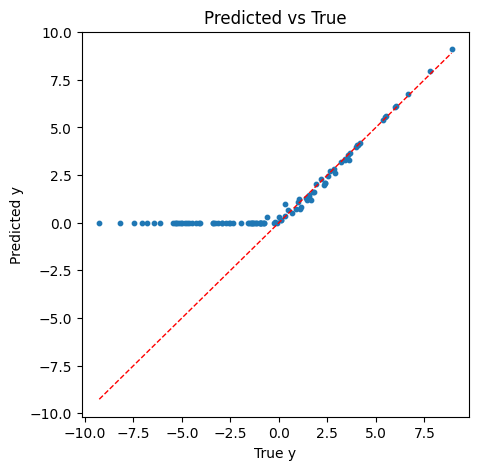

In [19]:
import matplotlib.pyplot as plt

# After training:
y_pred = model.forward(X)

plt.figure(figsize=(5,5))
plt.scatter(y_true, y_pred, s=10)
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.title("Predicted vs True")
plt.plot([y_true.min(), y_true.max()],
         [y_true.min(), y_true.max()],
         'r--', lw=1)
plt.show()


In [9]:
print(y_pred)

[[1.99773685]
 [0.        ]
 [6.73823195]
 [2.09606803]
 [0.        ]
 [0.        ]
 [0.80398699]
 [0.        ]
 [3.30556264]
 [3.1628009 ]
 [0.        ]
 [3.95603885]
 [9.10548663]
 [0.48861356]
 [0.        ]
 [0.        ]
 [4.1883419 ]
 [0.        ]
 [0.        ]
 [0.14748777]
 [2.28810016]
 [0.        ]
 [0.35745069]
 [0.        ]
 [0.        ]
 [0.        ]
 [2.43200727]
 [0.        ]
 [0.        ]
 [0.01912013]
 [0.        ]
 [3.5457804 ]
 [1.45771839]
 [0.        ]
 [0.        ]
 [0.73616809]
 [6.05491172]
 [2.81133282]
 [0.32277321]
 [0.        ]
 [0.        ]
 [5.61592654]
 [0.        ]
 [2.6256894 ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [7.97531176]
 [0.        ]
 [0.        ]
 [1.30760439]
 [0.28725074]
 [1.2431092 ]
 [0.        ]
 [0.        ]
 [2.10374713]
 [0.        ]
 [4.06213108]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.12662219]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.59944429]
 [4.08183251]
 [0.        ]
 [0.  